# pso

PSO - Melhor Acurácia: 96.0 %
Acurácias das Iterações: [90.66666666666666, 91.33333333333333, 92.66666666666666, 93.33333333333333]


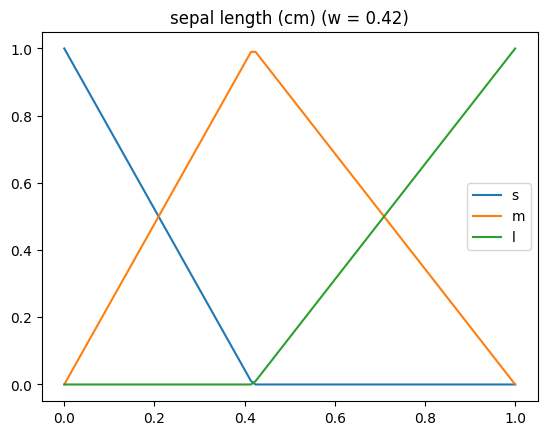

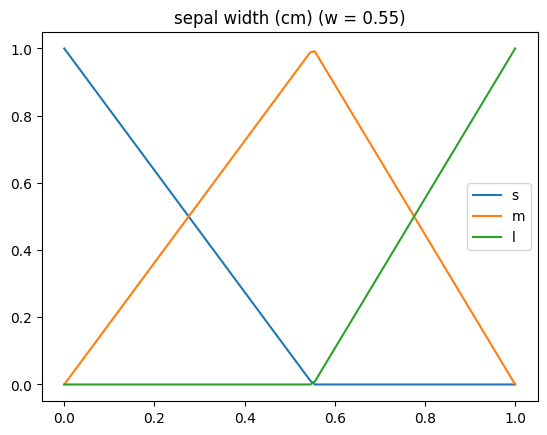

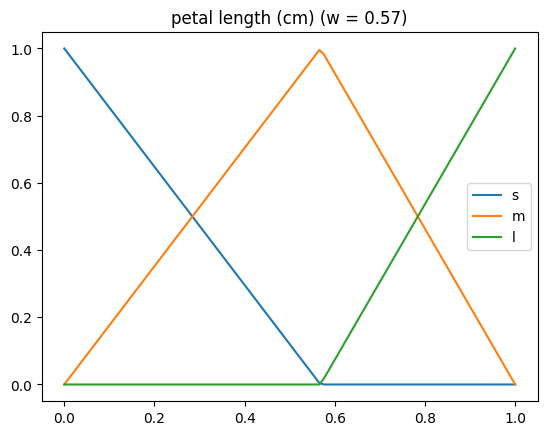

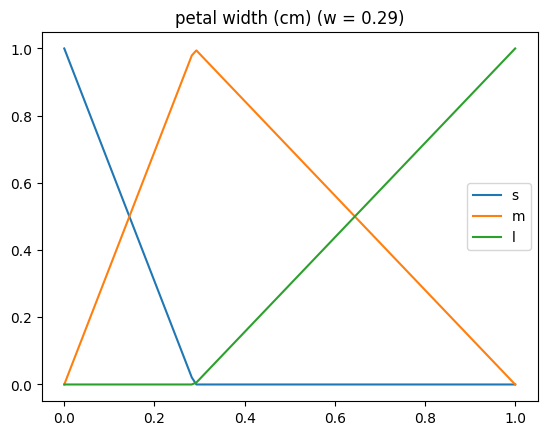

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from scipy.optimize import minimize
import skfuzzy as fuzz

# Função para definir as funções de pertinência
def define_membership_functions(var, w):
    universe = np.linspace(0, 1, 100)
    var['s'] = fuzz.trimf(universe, [0.0, 0.0, w])
    var['m'] = fuzz.trimf(universe, [0.0, w, 1.0])
    var['l'] = fuzz.trimf(universe, [w, 1.0, 1.0])

# Função de otimização
def fuzzy(w1, w2, w3, w4, data, target):
    universe = np.linspace(0, 1, 100)
    membs_func = []
    for w in [w1, w2, w3, w4]:
        membs_func.append({'s': fuzz.trimf(universe, [0.0, 0.0, w]), 'm': fuzz.trimf(universe, [0.0, w, 1.0]), 'l': fuzz.trimf(universe, [w, 1.0, 1.0])})

    memb_deg = []
    for i in range(4):
        memb_deg.append({})
        for v in ['s', 'm', 'l']:
            memb_deg[i][v] = fuzz.interp_membership(universe, membs_func[i][v], data[:, i])

    setosa = np.fmin(np.fmax(memb_deg[2]['s'], memb_deg[2]['m']), memb_deg[3]['s'])
    versicolor = np.fmax(np.fmin(np.fmin(np.fmin(np.fmax(memb_deg[0]['s'], memb_deg[0]['l']), np.fmax(memb_deg[1]['m'], memb_deg[1]['l'])), np.fmax(memb_deg[2]['m'], memb_deg[2]['l'])),memb_deg[3]['m']), np.fmin(memb_deg[0]['m'], np.fmin(np.fmin(np.fmax(memb_deg[1]['s'], memb_deg[1]['m']),memb_deg[2]['s']), memb_deg[3]['l'])))
    virginica = np.fmin(np.fmin(np.fmax(memb_deg[1]['s'], memb_deg[1]['m']), memb_deg[2]['l']), memb_deg[3]['l'])

    result = np.argmax([setosa, versicolor, virginica], axis=0)

    accuracy = (result == target).mean()

    return accuracy


def pso(fitness, bounds, num_particles, maxiter):
    lb, ub = np.array(bounds).T
    n_dimensions = len(bounds)
    n_particles = num_particles
    max_iter = maxiter

    particles = np.empty((n_particles, n_dimensions))
    for i in range(n_particles):
        while True:
            particle = np.random.uniform(low=lb, high=ub, size=n_dimensions)
            particles[i] = particle
            break
    
    personal_best_scores = np.array([fitness(p) for p in particles])
    velocities = np.zeros((n_particles, n_dimensions))
    personal_best_positions = particles.copy()

    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
    global_best_score = min(personal_best_scores)
    
    accuracies = []

    for i in range(max_iter):
        for j in range(n_particles):
          

          # Definindo parâmetros do PSO
            w = 0.5
            c1 = 1
            c2 = 1
            velocities[j] = (w * velocities[j] +
                             c1 * np.random.rand() * (personal_best_positions[j] - particles[j]) +
                             c2 * np.random.rand() * (global_best_position - particles[j]))
            
            particles[j] += velocities[j]
            particles[j] = np.clip(particles[j], lb, ub)
            
            score = fitness(particles[j])
            if score < personal_best_scores[j]:
                personal_best_positions[j] = particles[j].copy()
                personal_best_scores[j] = score
                
                if score < global_best_score:
                    global_best_position = particles[j].copy()
                    global_best_score = score
                    accuracies.append((1-global_best_score)*100)
            #print('------------------------------------------------------')
            #print(f'geracao {i+1} / 100')
            #print(f'melhor fitness: {(1-global_best_score)}')
            

    return global_best_position, global_best_score, accuracies

#PSO
iris = load_iris()
scaler = MinMaxScaler()
iris_normalizada = scaler.fit_transform(iris.data)

fitness = lambda w: 1.0 - fuzzy(w[0], w[1], w[2], w[3], iris_normalizada, iris.target)

fbest = float("inf")
best = None
pso_accuracies = []

for _ in range(5):
      
    bounds=[(0, 1), (0, 1), (0, 1), (0, 1)] 
    best_i, fbest_i, accuracies = pso(fitness, bounds, num_particles=10, maxiter=50)
    pso_accuracies.append(1-fbest_i)
    if fbest_i < fbest:
        best, fbest = best_i, fbest_i
        #print('Fitness de cada partícula: ', fbest)
    
print('PSO - Melhor Acurácia:', (1-fbest)*100, "%")
print('Acurácias das Iterações:', accuracies)

universe = np.linspace(0, 1, 100)
labels = ['s', 'm', 'l']
iris_feature_names = iris.feature_names
for i, w in enumerate(best):
    plt.figure()
    plt.title(f'{iris_feature_names[i]} (w = {w:.2f})')
    for lbl in labels:
        if lbl == 's':
            plt.plot(universe, fuzz.trimf(universe, [0.0, 0.0, w]), label=lbl)
        elif lbl == 'm':
            plt.plot(universe, fuzz.trimf(universe, [0.0, w, 1.0]), label=lbl)
        else:
            plt.plot(universe, fuzz.trimf(universe, [w, 1.0, 1.0]), label=lbl)
    plt.legend()
plt.show()




#ga

Melhor indivíduo : [0.54308462 0.65329256 0.22208353 0.41353245]
Melhor acurácia: 0.96
Melhor indivíduo : [0.42746229 0.582846   0.5762114  0.23170295]
Melhor acurácia: 0.96
Melhor indivíduo : [0.18179611 0.41804341 0.52872011 0.19291911]
Melhor acurácia: 0.96
Melhor indivíduo : [0.07618194 0.10579088 0.81410599 0.24500722]
Melhor acurácia: 0.96
Melhor indivíduo : [0.13727942 0.32738439 0.51922176 0.2012898 ]
Melhor acurácia: 0.96


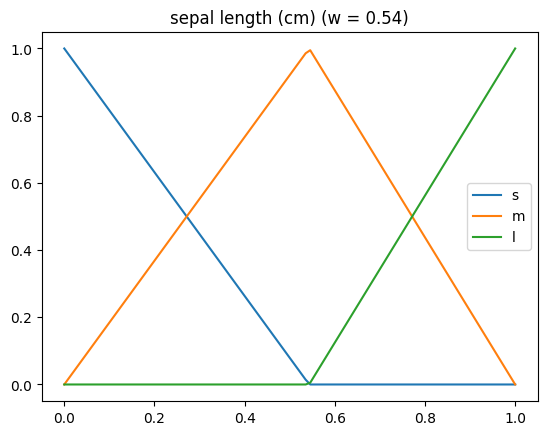

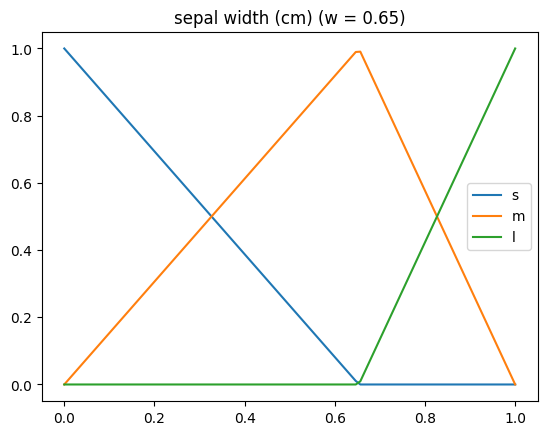

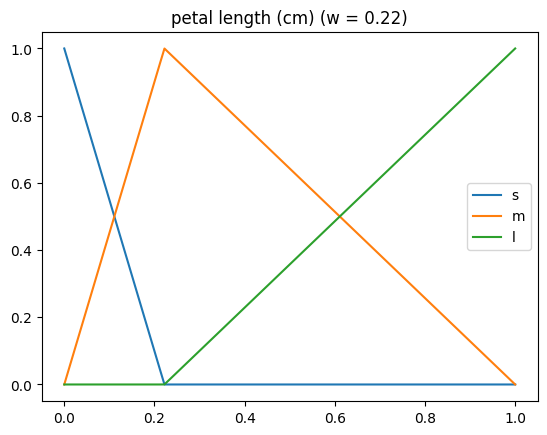

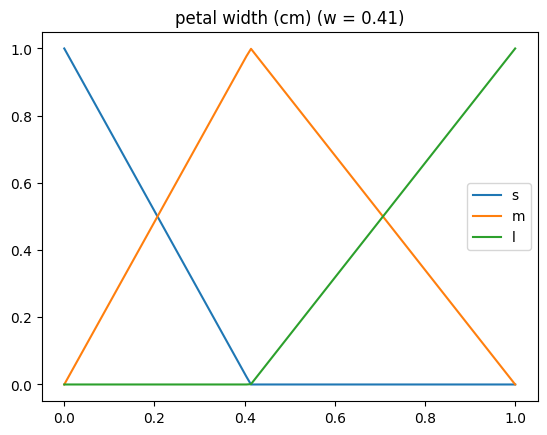

In [11]:
import numpy as np
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Função para definir as funções de pertinência
def define_membership_functions(var, w):
    universe = np.linspace(0, 1, 100)
    var['s'] = fuzz.trimf(universe, [0.0, 0.0, w])
    var['m'] = fuzz.trimf(universe, [0.0, w, 1.0])
    var['l'] = fuzz.trimf(universe, [w, 1.0, 1.0])

# Função de otimização
def fuzzy(w1, w2, w3, w4, data, target):
    universe = np.linspace(0, 1, 100)
    membs_func = []
    for w in [w1, w2, w3, w4]:
        membs_func.append({'s': fuzz.trimf(universe, [0.0, 0.0, w]), 'm': fuzz.trimf(universe, [0.0, w, 1.0]), 'l': fuzz.trimf(universe, [w, 1.0, 1.0])})

    memb_deg = []
    for i in range(4):
        memb_deg.append({})
        for v in ['s', 'm', 'l']:
            memb_deg[i][v] = fuzz.interp_membership(universe, membs_func[i][v], data[:, i])

    setosa = np.fmin(np.fmax(memb_deg[2]['s'], memb_deg[2]['m']), memb_deg[3]['s'])
    versicolor = np.fmax(np.fmin(np.fmin(np.fmin(np.fmax(memb_deg[0]['s'], memb_deg[0]['l']), np.fmax(memb_deg[1]['m'], memb_deg[1]['l'])), np.fmax(memb_deg[2]['m'], memb_deg[2]['l'])),memb_deg[3]['m']), np.fmin(memb_deg[0]['m'], np.fmin(np.fmin(np.fmax(memb_deg[1]['s'], memb_deg[1]['m']),memb_deg[2]['s']), memb_deg[3]['l'])))
    virginica = np.fmin(np.fmin(np.fmax(memb_deg[1]['s'], memb_deg[1]['m']), memb_deg[2]['l']), memb_deg[3]['l'])

    result = np.argmax([setosa, versicolor, virginica], axis=0)

    accuracy = (result == target).mean()
    return accuracy

# Função de fitness
def fitness(individual):
    return fuzzy(individual[0], individual[1], individual[2], individual[3], iris_normalizada, iris.target)

# Função de inicialização
def initialize_population():
    return np.random.uniform(low=0.0, high=1.0, size=(POPULATION_SIZE, CHROMOSOME_LENGTH))

# Função para selecionar o melhor indivíduo em um torneio
def _tournament_selection(population, fitness_func):
    idxs = np.random.permutation(np.arange(len(population)))

    parent1 = population[idxs[0]]
    parent2 = population[idxs[1]]

    if fitness(parent1) > fitness(parent2):
        return parent1
    else:
        return parent2

# Função de crossover
def _crossover(parent1, parent2):
    if np.random.rand() < CROSSOVER_RATE:
        alpha = 0.5
        shift = np.abs(parent1 - parent2) * alpha
        mmin = np.clip(np.min([parent1, parent2]) - shift, 0, 1)
        mmax = np.clip(np.max([parent1, parent2]) + shift, 0, 1)
        offspring1 = np.random.uniform(mmin, mmax, size=CHROMOSOME_LENGTH)
        offspring2 = np.random.uniform(mmin, mmax, size=CHROMOSOME_LENGTH)
        return offspring1, offspring2
    else:
        return parent1, parent2

# Função de mutação
def _mutate(individual):
    if np.random.rand() < MUTATION_RATE:
        individual[np.random.randint(CHROMOSOME_LENGTH)] = np.random.rand()
    return individual

def genetic_algorithm():

    # Inicialize a população
    population = initialize_population()
    # Calcule a aptidão para cada indivíduo na população
    fitness_values = np.array([fitness(individual) for individual in population])
    for generation in range(100):
        
        new_population = []
        while len(new_population) < POPULATION_SIZE:
            # Selecione dois pais
            parent1 = _tournament_selection(population, fitness_values)
            parent2 = _tournament_selection(population, fitness_values)
            while np.array_equal(parent1, parent2):
                parent2 = _tournament_selection(population, fitness_values)
            # Realize o crossover e a mutação para gerar dois filhos
            offspring1, offspring2 = _crossover(parent1, parent2)
            offspring1 = _mutate(offspring1)
            offspring2 = _mutate(offspring2)
            # Adicione os filhos à nova população
            new_population.append(offspring1)
            new_population.append(offspring2)
        # Transforme a lista em um array para manipulação mais fácil
        new_population = np.array(new_population)
        # Calcule a aptidão para cada indivíduo na nova população
        new_fitness_values = np.array([fitness(individual) for individual in new_population])
        # Combine a antiga população e a nova população
        combined_population = np.concatenate((population, new_population))
        combined_fitness_values = np.concatenate((fitness_values, new_fitness_values))
        # Selecione os POPULATION_SIZE melhores indivíduos
        best_indices = np.argsort(combined_fitness_values)[-POPULATION_SIZE:]
        population = combined_population[best_indices]
        fitness_values = combined_fitness_values[best_indices]
        #print('------------------------------------------------------')
        #print(f'geracao {generation+1} / 100')
        #print(f'melhor fitness: {fitness_values[np.argmax(fitness_values)]}')
        #print(f'pior fitness: {fitness_values[np.argmin(fitness_values)]}')
    # O melhor indivíduo é o que tem a maior aptidão na população
    best_individual = population[np.argmax(fitness_values)]
    best_accuracy = fitness_values[np.argmax(fitness_values)]
    return best_individual, best_accuracy


# Carregar o conjunto de dados Iris
iris = load_iris()
scaler = MinMaxScaler()
iris_normalizada = scaler.fit_transform(iris.data)

# Parâmetros do algoritmo genético
POPULATION_SIZE = 60
CHROMOSOME_LENGTH = 4
TOURNAMENT_SIZE = 2
CROSSOVER_RATE = 0.9
MUTATION_RATE = 0.1

ga_accuracies= []
best_global_individual = None
best_global_accuracy = -1
for k in range(5):
  # Execute o algoritmo genético
  best_individual, best_accuracy = genetic_algorithm()
  ga_accuracies.append(best_accuracy)
  
  if best_accuracy > best_global_accuracy:
    best_global_individual = best_individual
    best_global_accuracy = best_accuracy
  
  print("Melhor indivíduo :", best_individual)
  print("Melhor acurácia:", best_accuracy)

# Plotar as funções de pertinência para o melhor indivíduo global
universe = np.linspace(0, 1, 100)
labels = ['s', 'm', 'l']
iris_feature_names = iris.feature_names
for i, w in enumerate(best_global_individual):
    plt.figure()
    plt.title(f'{iris_feature_names[i]} (w = {w:.2f})')    
    for lbl in labels:
        if lbl == 's':
            plt.plot(universe, fuzz.trimf(universe, [0.0, 0.0, w]), label=lbl)
        elif lbl == 'm':
            plt.plot(universe, fuzz.trimf(universe, [0.0, w, 1.0]), label=lbl)
        else:
            plt.plot(universe, fuzz.trimf(universe, [w, 1.0, 1.0]), label=lbl)
    plt.legend()
plt.show()





In [12]:
pso_accuracies

[0.96,
 0.9466666666666667,
 0.9466666666666667,
 0.9333333333333333,
 0.9333333333333333]

In [13]:
ga_accuracies

[0.96, 0.96, 0.96, 0.96, 0.96]

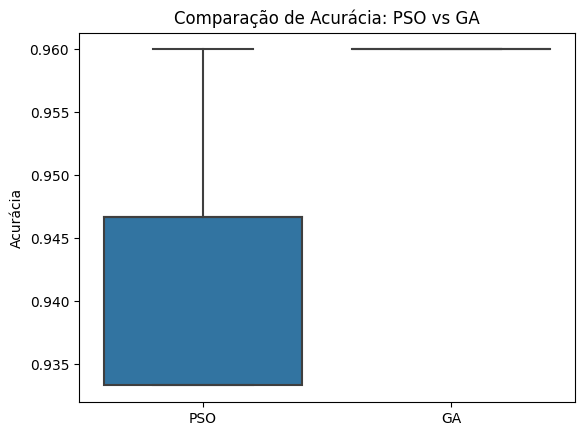

In [14]:
import pandas as pd
import seaborn as sns

# Transforme as listas em um DataFrame
data = pd.DataFrame({
    'PSO': pso_accuracies,
    'GA': ga_accuracies
})

# Crie o boxplot
sns.boxplot(data=data)
plt.title('Comparação de Acurácia: PSO vs GA')
plt.ylabel('Acurácia')
plt.show()
